##Student name = fatima Nawab
# **EDA - Assignment 1**

Total marks: 35


| Task                      | Marks |
|---------------------------|-------|
| Import Libraries and Read Dataset | 2 |
| Data information |  2 |
| Statistical Summary |  2 |
| Data type conversions  | 2        |
| Handle Duplicate Values | 4 |
| Handle Missing Values | 4 |
| Display unique Values | 2 |
| Clean department column | 2 |
| Fuzzy Matching | 4 |
|  Boxplot       | 2  |
|  IQR | 4 |
|  Winsorize | 4 |




## **Import libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
!pip install fuzzywuzzy
!pip install python-levenshtein
import fuzzywuzzy
from fuzzywuzzy import fuzz, process
from scipy.stats.mstats import winsorize
import re


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.8 MB/s eta 0:00:00


## **Read Dataset**


Dataset Link:
https://docs.google.com/spreadsheets/d/1P9_zO4HoqiXOW9fdhcHlZbRtr1JwWGQFjhAIQvI5e7M/edit?usp=sharing


The dataset can be accessed directly from Google Sheets, or alternatively, it may be downloaded and then uploaded to Colab.

In [ ]:
url ="https://docs.google.com/spreadsheets/d/1P9_zO4HoqiXOW9fdhcHlZbRtr1JwWGQFjhAIQvI5e7M/export?format=csv"

In [ ]:
data = pd.read_csv(url)

In [ ]:
data

,Employee_ID,Name,Age,Department,Salary,Joining_Date,City,Salary_Winsorized,Salary_winsorized
0,2001,Anna Johnson,58.0,Operations,51000,2012-03-08,Los Angeles,51000,51000
1,2002,Emily Johnson,48.0,Operations,65000,2013-04-12,Chicago,65000,65000
2,2003,Mike Smith,34.0,HR,59000,2010-01-06,New York,59000,59000
3,2004,Anna Williams,27.0,Sales,56000,2016-04-28,Los Angeles,56000,56000
4,2005,Anna Miller,40.0,HR,58000,2013-05-30,Phoenix,58000,58000
...,...,...,...,...,...,...,...,...,...
1019,2278,Robert Williams,36.0,Operations,52000,2019-11-21,Houston,52000,52000
1020,2279,John Miller,52.0,IT,115000,2010-03-06,Phoenix,87000,87000
1021,2280,Anna Jones,31.0,Operations,70000,2018-10-28,Chicago,70000,70000
1022,2281,Sophia Garcia,41.0,Marketing,69000,2014-06-18,Houston,69000,69000


### **Information about dataset**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1024 non-null   int64  
 1   Name               1024 non-null   object 
 2   Age                942 non-null    float64
 3   Department         1024 non-null   object 
 4   Salary             1024 non-null   int64  
 5   Joining_Date       1024 non-null   object 
 6   City               1024 non-null   object 
 7   Salary_Winsorized  1024 non-null   int64  
 8   Salary_winsorized  1024 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 72.1+ KB


In [ ]:
data.shape

(1024, 9)

In [ ]:
data.sample(8)       # random sample


,Employee_ID,Name,Age,Department,Salary,Joining_Date,City
661,2662,James Williams,57.0,Operations,69000,2010-05-21,Houston
1000,2259,Sarah Brown,54.0,Finance,90000,2018-09-18,Los Angeles
786,2787,Robert Davis,22.0,Finance,76000,2016-02-01,Los Angeles
741,2742,Sophia Williams,22.0,Sales,62000,2011-12-15,Houston
257,2258,Olivia Davis,44.0,HR,46000,2019-05-14,Phoenix
325,2326,Robert Williams,21.0,IT,74000,2016-11-28,New York
315,2316,Emily Johnson,22.0,Operations,57000,2015-08-22,Phoenix
572,2573,David Brown,58.0,Operations,59000,2010-11-02,Chicago


In [ ]:
data.tail(3)

,Employee_ID,Name,Age,Department,Salary,Joining_Date,City
1021,2280,Anna Jones,31.0,Operations,70000,2018-10-28,Chicago
1022,2281,Sophia Garcia,41.0,Marketing,69000,2014-06-18,Houston
1023,2282,Mike Jones,NaN,Sales,66000,2016-07-22,Houston


### **Statistical Summary**

In [ ]:
data.describe()

,Employee_ID,Age,Salary
count,1024.000000,942.000000,1024.000000
mean,2495.109375,40.131635,62390.625000
std,287.528729,11.998303,14681.025252
min,2001.000000,20.000000,30000.000000
25%,2256.750000,30.000000,51000.000000
50%,2488.500000,41.000000,61000.000000
75%,2744.250000,51.000000,73000.000000
max,3000.000000,60.000000,115000.000000


In [ ]:
data.describe(include='number')

,Employee_ID,Age,Salary
count,1024.000000,942.000000,1024.000000
mean,2495.109375,40.131635,62390.625000
std,287.528729,11.998303,14681.025252
min,2001.000000,20.000000,30000.000000
25%,2256.750000,30.000000,51000.000000
50%,2488.500000,41.000000,61000.000000
75%,2744.250000,51.000000,73000.000000
max,3000.000000,60.000000,115000.000000


In [ ]:
data.describe(include='object')

,Name,Department,Joining_Date,City
count,1024,1024,1024,1024
unique,100,14,874,5
top,Sophia Garcia,Marketing,2019-11-20,Chicago
freq,18,187,4,218


### **Data Type Converions**
**Convert order_date into datetime format.**

In [ ]:
data.dtypes

,0
Employee_ID,int64
Name,object
Age,float64
Department,object
Salary,int64
Joining_Date,object
City,object
Salary_Winsorized,int64
Salary_winsorized,int64


In [ ]:
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')   # Salary -> numeric (coerce bad strings to NaN)

In [ ]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')         # Age -> numeric


In [ ]:
data['Employee_ID'] = data['Employee_ID'].astype(str).str.strip()    # Employee_ID -> string


In [ ]:
data["Joining_Date"] = pd.to_datetime(data["Joining_Date"], format="%m/%d/%y %H:%M", errors="coerce")

In [ ]:
data.dtypes

,0
Employee_ID,object
Name,object
Age,float64
Department,object
Salary,int64
Joining_Date,datetime64[ns]
City,object
Salary_Winsorized,int64
Salary_winsorized,int64


### **Duplicate values**

Check for duplicate rows and remove them if any.


In [ ]:
data.duplicated().sum()

np.int64(19)

In [ ]:
data[data.duplicated()]

,Employee_ID,Name,Age,Department,Salary,Joining_Date,City,Salary_Winsorized,Salary_winsorized
1002,2261,Robert Wilson,48.0,Finance,78000,NaT,Los Angeles,78000,78000
1003,2262,Sophia Jones,37.0,HR,58000,NaT,Chicago,58000,58000
1004,2263,Olivia Lopez,37.0,Sales,32000,NaT,Chicago,40000,40000
1005,2264,Olivia Miller,21.0,Finance,84000,NaT,Houston,84000,84000
1007,2266,Sarah Brown,35.0,HR,41000,NaT,Houston,41000,41000
1008,2267,Sophia Miller,60.0,HR,45000,NaT,Los Angeles,45000,45000
1009,2268,Sophia Brown,55.0,HR,49000,NaT,Houston,49000,49000
1011,2270,John Williams,23.0,IT,72000,NaT,Phoenix,72000,72000
1012,2271,Sophia Miller,52.0,Marketing,54000,NaT,Houston,54000,54000
1013,2272,James Garcia,33.0,Operations,74000,NaT,Los Angeles,74000,74000


In [ ]:
dups = data[data.duplicated(keep=False)]
print("Full-row duplicate count:", len(dups))
display(dups.head())

Full-row duplicate count: 38


,Employee_ID,Name,Age,Department,Salary,Joining_Date,City,Salary_Winsorized,Salary_winsorized
260,2261,Robert Wilson,48.0,Finance,78000,NaT,Los Angeles,78000,78000
261,2262,Sophia Jones,37.0,HR,58000,NaT,Chicago,58000,58000
262,2263,Olivia Lopez,37.0,Sales,32000,NaT,Chicago,40000,40000
263,2264,Olivia Miller,21.0,Finance,84000,NaT,Houston,84000,84000
265,2266,Sarah Brown,35.0,HR,41000,NaT,Houston,41000,41000


In [ ]:
empid_dups = data[data.duplicated(subset=['Employee_ID'], keep=False)]
print("Employee_ID duplicates:", len(empid_dups))
display(empid_dups)

Employee_ID duplicates: 48


,Employee_ID,Name,Age,Department,Salary,Joining_Date,City,Salary_Winsorized,Salary_winsorized
258,2259,Sarah Brown,54.0,Finance,72000,NaT,Los Angeles,72000,72000
259,2260,James Miller,NaN,Sales,58000,NaT,Phoenix,58000,58000
260,2261,Robert Wilson,48.0,Finance,78000,NaT,Los Angeles,78000,78000
261,2262,Sophia Jones,37.0,HR,58000,NaT,Chicago,58000,58000
262,2263,Olivia Lopez,37.0,Sales,32000,NaT,Chicago,40000,40000
263,2264,Olivia Miller,21.0,Finance,84000,NaT,Houston,84000,84000
264,2265,David Davis,54.0,IT,79000,NaT,Los Angeles,79000,79000
265,2266,Sarah Brown,35.0,HR,41000,NaT,Houston,41000,41000
266,2267,Sophia Miller,60.0,HR,45000,NaT,Los Angeles,45000,45000
267,2268,Sophia Brown,55.0,HR,49000,NaT,Houston,49000,49000


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

### **Missing value**


In [ ]:
data.isnull().sum()

,0
Employee_ID,0
Name,0
Age,81
Department,0
Salary,0
Joining_Date,1005
City,0
Salary_Winsorized,0
Salary_winsorized,0


In [ ]:
data[data.isnull().all(axis=1)]

,Employee_ID,Name,Age,Department,Salary,Joining_Date,City,Salary_Winsorized,Salary_winsorized


In [ ]:
data[data.isnull().any(axis=1)]

,Employee_ID,Name,Age,Department,Salary,Joining_Date,City,Salary_Winsorized,Salary_winsorized
0,2001,Anna Johnson,58.0,Operations,51000,NaT,Los Angeles,51000,51000
1,2002,Emily Johnson,48.0,Operations,65000,NaT,Chicago,65000,65000
2,2003,Mike Smith,34.0,HR,59000,NaT,New York,59000,59000
3,2004,Anna Williams,27.0,Sales,56000,NaT,Los Angeles,56000,56000
4,2005,Anna Miller,40.0,HR,58000,NaT,Phoenix,58000,58000
...,...,...,...,...,...,...,...,...,...
1000,2259,Sarah Brown,54.0,Finance,90000,NaT,Los Angeles,87000,87000
1001,2260,James Miller,NaN,Sales,90000,NaT,Phoenix,87000,87000
1006,2265,David Davis,54.0,IT,108000,NaT,Los Angeles,87000,87000
1010,2269,Robert Brown,52.0,IT,97000,NaT,Chicago,87000,87000


**Fill age with appropriate method(mean,median, interpolation)**

In [ ]:
data['Age'].sample(20)

,Age
809,60.0
933,51.0
416,NaN
648,32.0
194,57.0
26,46.0
298,36.0
838,59.0
656,47.0
529,48.0


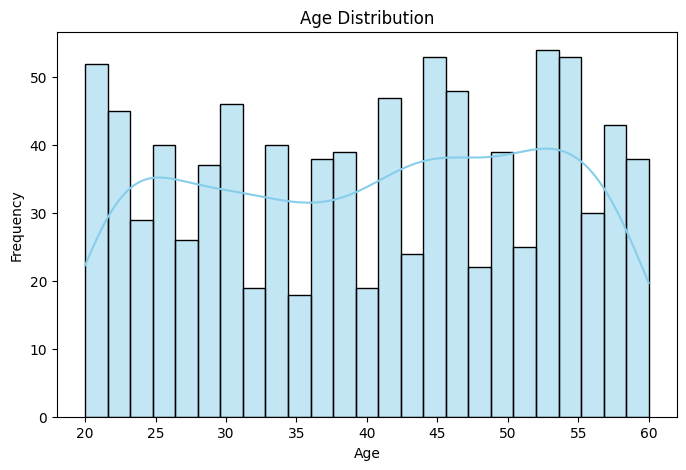

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data["Age"], bins=25, kde=True, color="skyblue")
plt.title("Age Distribution", fontsize=12)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

###**output interpretation**
1. This histogram shows that most employees are between 40–45 years old, where the highest peak occurs.
2. The age distribution is fairly spread out between 20 and 60, showing a diverse workforce.
3. Overall, the data is not perfectly normal, but slightly concentrated around middle-aged employees.

In [ ]:
data ['Age'] = data ['Age'].fillna (data ['Age'].median())
print("Median Age:", data["Age"].median())

Median Age: 41.0


### **Display Unique values in Departments and City columns**

In [ ]:
data['Department'].unique()

array(['Operations', 'HR', 'Sales', 'Marketing', 'Finance', 'IT',
       'marketing', '        HR', 'IT.', 'Operationsssss', 'Marketingg',
       'Marke ting', 'HR.', '     IT    '], dtype=object)

In [ ]:
data['City'].unique()

array(['Los Angeles', 'Chicago', 'New York', 'Phoenix', 'Houston'],
      dtype=object)

### **Clean the department column**

In [ ]:
data["Department"].value_counts()

,count
Department,
Marketing,184
Sales,175
Finance,172
Operations,169
HR,152
IT,145
marketing,1
HR,1
IT.,1


In [ ]:
data['Department'] = data['Department'].astype(str).str.strip()

In [ ]:
data['Department'] = data['Department'].str.title()

In [ ]:
data['Department'] = data['Department'].str.replace('.', '', regex=False)

In [ ]:
data['Department'] = data['Department'].replace({
    'Marketingg': 'Marketing',
    'Marke Ting': 'Marketing',
    'Operationsssss': 'Operations'
})

In [ ]:
data["Department"].value_counts()

,count
Department,
Marketing,190
Sales,177
Finance,176
Operations,174
Hr,158
It,149


### **Fuzzy Matching**

**Try different minimum_scores like 95, 90, 80**.

In [ ]:
def fuzzy_match_replace(data, column, base_word, min_score=90):
  choices = data[column].unique()
  matches = process.extract(base_word, choices, limit=len(choices))

  for match, score in matches:
        if score >= min_score and match != base_word:
            data.loc[data[column] == match, column] = base_word
            print(f"Replaced '{match}' with '{base_word}' (score: {score})")


In [ ]:
for score in [95, 90, 80]:
    print(f"\n Minimum Score = {score}")
    for base in ['HR', 'IT', 'Marketing', 'Finance', 'Sales', 'Operations']:
        fuzzy_match_replace(data, 'Department', base, min_score=score)



 Minimum Score = 95
Replaced 'Hr' with 'HR' (score: 100)
Replaced 'It' with 'IT' (score: 100)

 Minimum Score = 90

 Minimum Score = 80


In [ ]:
print("Cleaned Department List:")
print(data['Department'].unique())


Cleaned Department List:
['Operations' 'Hr' 'Sales' 'Marketing' 'Finance' 'It']


### **Detect Outliers**

#### **Boxplot**
**Plot the boxplot of column "Salary".**


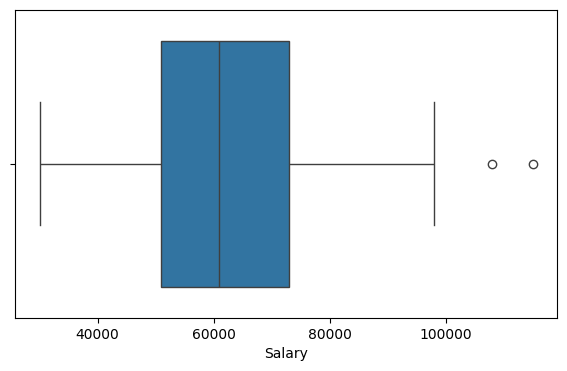

In [ ]:
 plt.figure(figsize=(7,4))
 sns.boxplot(x=data['Salary'])
 plt.show()

**###Solution**
1. Rectangle Represents the middle 50% of the data — from the 25th percentile (Q1) to the 75th percentile (Q3).
2. line inside represents median (Q2) — half of the salaries are above this line, half below
3. whiskers extend to the lowest and highest non-outlier values — roughly within 1.5×IQR from Q1 and Q3
4. Dots are outliers — unusually high or low salaries compared to the rest of the data.

#### **output interpretation**
1. Most salaries are between ~40,000 and ~100,000.
2. The median salary is around 60,000.
3. The two dots on the right represent outliers — unusually high salaries compared to others.
4. No major low-end outliers are visible, suggesting data is mostly well-behaved except for a few high salaries.

#### **IQR**
**Find outliers using IQR method**

1. Find Q1, Q3, IQR, lower_bound and upper bound.
2. Display the values of price if its less than lower_bound or greater than upper_bound.
3. If there is no value, then it means there is no outlier.

###solution:
Q1 (25th percentile): 25% of data falls below this value.

Q3 (75th percentile): 75% of data falls below this value.

IQR: The middle 50% of your data.

Lower Bound / Upper Bound: Any data points outside this range are considered outliers.

In [ ]:
Q1=data['Salary'].quantile(0.25)
Q3=data['Salary'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
data[(data['Salary']<lower_bound) | (data['Salary']>upper_bound)]


,Employee_ID,Name,Age,Department,Salary,Joining_Date,City
1006,2265,David Davis,54.0,IT,108000,2015-05-31,Los Angeles
1020,2279,John Miller,52.0,IT,115000,2010-03-06,Phoenix


### **Winsorize**

**Apply Winsorization to cap the extreme 5% of values from both lower and upper ends of the Salary distribution**



In [ ]:
#  Winsorization (5% lower, 5% upper)
data['Salary_winsorized'] = winsorize(data['Salary'], limits=[0.05, 0.05])


In [ ]:
data[['Salary', 'Salary_winsorized']].head(10)

,Salary,Salary_winsorized
0,51000,51000
1,65000,65000
2,59000,59000
3,56000,56000
4,58000,58000
5,61000,61000
6,59000,59000
7,30000,40000
8,72000,72000
9,49000,49000


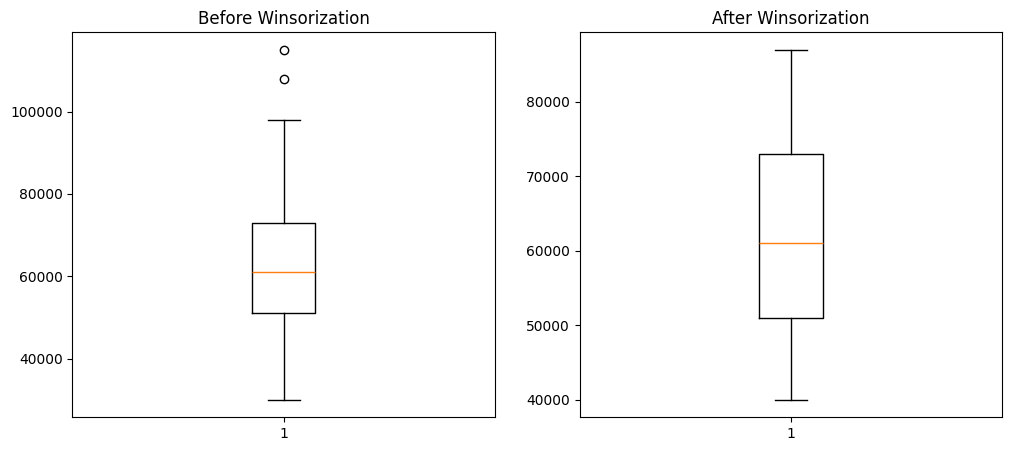

In [ ]:
plt.figure(figsize=(12,5))

# Before Winsorization
plt.subplot(1,2,1)
plt.boxplot(data['Salary'])
plt.title("Before Winsorization")

# After Winsorization
plt.subplot(1,2,2)
plt.boxplot(data['Salary_Winsorized'])
plt.title("After Winsorization")

plt.show()

###**solution**

Winsorization helps reduce the influence of extreme outliers without removing any data points.
In this step, the top and bottom 5% of salaries were capped to bring the data into a more stable range, improving the reliability of statistical analyses.

##**output interpretation**
###Before Winsorization (Left Plot)

1. You can see two dots above the box, those are outliers, meaning they’re salaries much higher than the rest.

2. The top whisker (the line above the box) goes quite high, close to 100,000+, which shows a few extreme values pulling the data upward.

3. The box (middle 50% of data) shows that most salaries lie between roughly 50,000 and 70,000, with a median (orange line) around 60,000.

###After Winsorization (Right Plot)

1. now outlier dots disappeared , Winsorization has capped those extreme values.

2. The maximum salary now ends around 90,000, instead of over 100,000.

3. The overall shape looks tighter, and the median (orange line) remains almost the same — meaning the main data distribution wasn’t affected much.

In [ ]:
print("Original Salary range:", data['Salary'].min(), "-", data['Salary'].max())
print("Winsorized Salary range:", data['Salary_Winsorized'].min(), "-", data['Salary_Winsorized'].max())


Original Salary range: 30000 - 115000
Winsorized Salary range: 40000 - 87000
